In [129]:
#importing pandas and numpy libraries
import numpy as np
import pandas as pd

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [131]:
#importing dataset from google drive
df = pd.read_csv("/content/drive/MyDrive/Creditcard/creditcard.csv")

In [132]:
#dataset type
type(df)

pandas.core.frame.DataFrame

In [133]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [134]:
#total rows and columns in the dataset
df.shape

(284807, 31)

In [135]:
#dataset column types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [136]:
#total null values in the dataset
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

there are zero null values present in the dataset

In [137]:
#first five rows of the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [138]:
#dataset information
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [139]:
#number of class values
df['Class'].nunique()

2

In [140]:
#this is a highly unbalanced data since the fraud transactions occure very less compared to legit trasactions
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [141]:
#importing data visuvalization libraries
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Frequency')

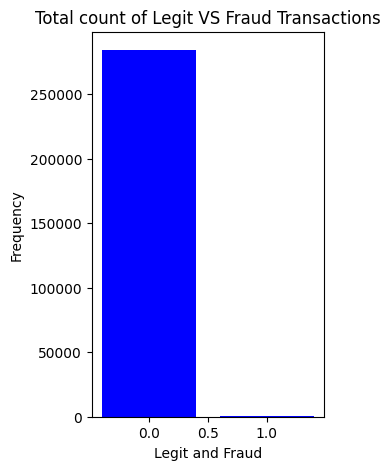

In [142]:

legitVSfraud_count = df['Class'].value_counts()
plt.figure(figsize=(3, 5))
# Create a bar plot
plt.bar(legitVSfraud_count.index, legitVSfraud_count.values, color='Blue')
plt.title("Total count of Legit VS Fraud Transactions")
plt.xlabel("Legit and Fraud")
plt.ylabel("Frequency")

In [143]:
fraud_transactions = df[df.Class == 1]
legit_transactions = df[df.Class == 0]

In [144]:
fraud_transactions.shape

(492, 31)

In [145]:
legit_transactions.shape

(284315, 31)

<Axes: >

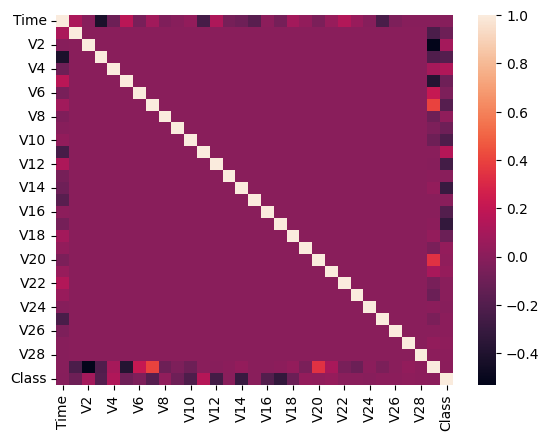

In [146]:
sns.heatmap(df.corr())

<Axes: >

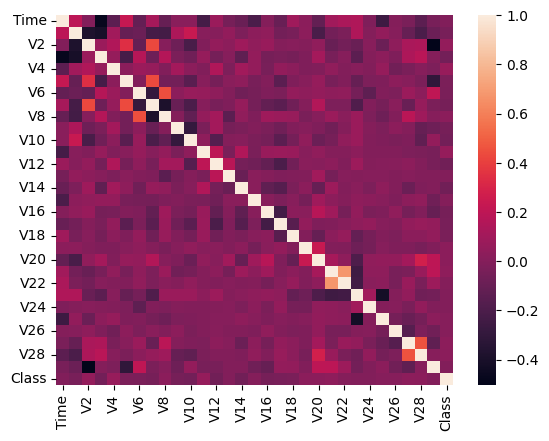

In [147]:
sns.heatmap(df.corr(method = "spearman"))

In [148]:
#fraud transactions description
print("transaction which are fraud")
df['Amount'][df['Class']==1].describe()

transaction which are fraud


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [149]:
#legit transactions description
print("transactions which are Legit")
df['Amount'][df['Class']==0].describe()

transactions which are Legit


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

<Axes: xlabel='Class', ylabel='Amount'>

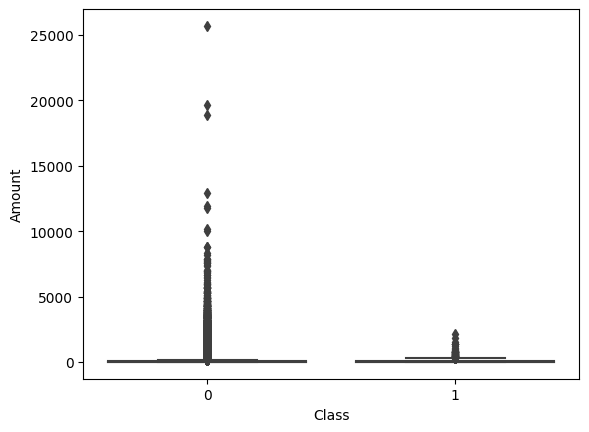

In [150]:
#to find the outliners in the amount column we need to plot the amount feature
sns.boxplot(x=df['Class'], y=df['Amount'])

In [151]:
#finding the relation between time and amount from the dataset
timeVSAmout = df[["Time", "Amount", "Class"]]

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


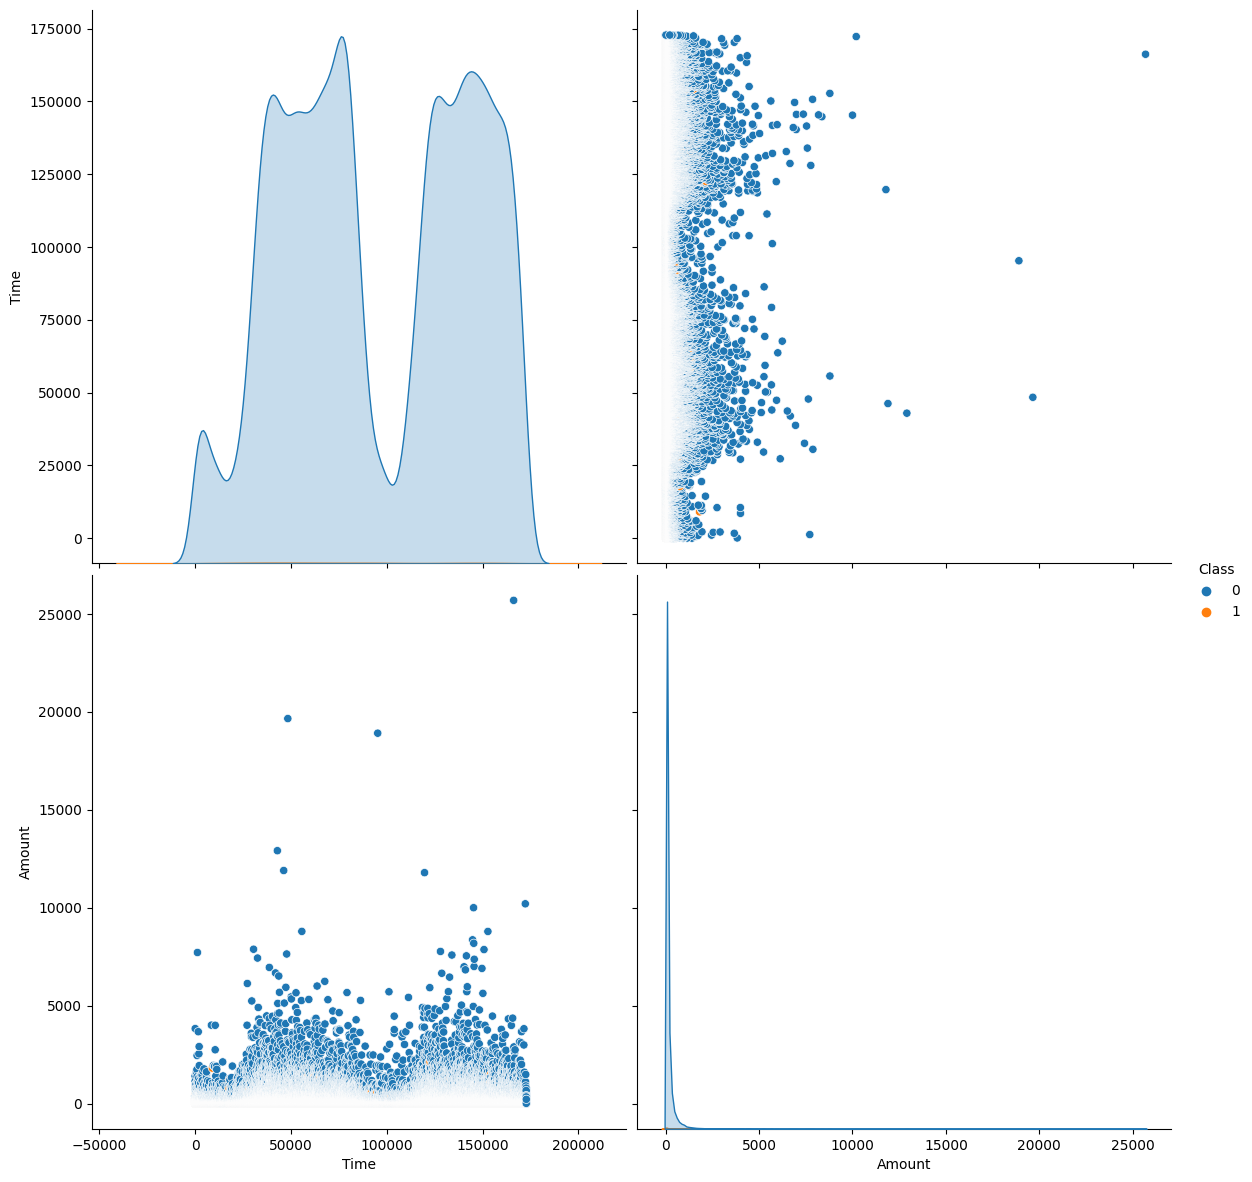

In [152]:
#plotting the timeVSamount data
sns.pairplot(timeVSAmout, hue="Class", size=6)
plt.show()

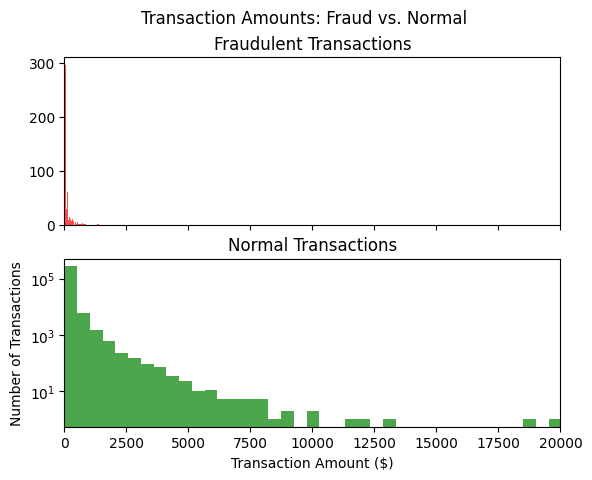

In [153]:
import matplotlib.pyplot as plt

# Create a figure with two subplots arranged vertically
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

# Set the overall title for the figure
fig.suptitle('Transaction Amounts: Fraud vs. Normal')

# Define the number of bins for the histograms
bins = 50

# Plot a histogram of transaction amounts for the 'Fraud' class
ax1.hist(fraud_transactions.Amount, bins=bins, color='red', alpha=0.7)
ax1.set_title('Fraudulent Transactions')  # Title for the first subplot

# Plot a histogram of transaction amounts for the 'Normal' class
ax2.hist(legit_transactions.Amount, bins=bins, color='green', alpha=0.7)
ax2.set_title('Normal Transactions')  # Title for the second subplot

# Set labels for x and y axes
plt.xlabel('Transaction Amount ($)')
plt.ylabel('Number of Transactions')

# Set the x-axis limits
plt.xlim((0, 20000))

# Use a logarithmic scale for the y-axis to better visualize the data
plt.yscale('log')

# Display the plotted figure
plt.show()


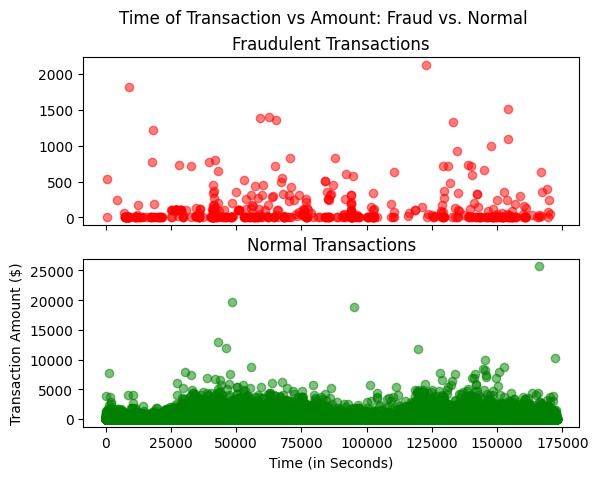

In [154]:
# Create a figure with two subplots arranged vertically
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

# Set the overall title for the figure
fig.suptitle('Time of Transaction vs Amount: Fraud vs. Normal')

# Plot a scatter plot of Time vs Amount for the 'Fraud' class
ax1.scatter(fraud_transactions.Time, fraud_transactions.Amount, color='red', alpha=0.5)
ax1.set_title('Fraudulent Transactions')  # Title for the first subplot

# Plot a scatter plot of Time vs Amount for the 'Normal' class
ax2.scatter(legit_transactions.Time, legit_transactions.Amount, color='green', alpha=0.5)
ax2.set_title('Normal Transactions')  # Title for the second subplot

# Set labels for x and y axes
plt.xlabel('Time (in Seconds)')
plt.ylabel('Transaction Amount ($)')

# Display the plotted figure
plt.show()


since the time difference between legit transactions and fraud transactions has no difference we will drop the time column which will be no use in futher

In [155]:
#droping the time column
df = df.drop(['Time'], axis=1)

In [156]:
#the data varincae of the all the features in the dataset
df.var()

V1            3.836489
V2            2.726820
V3            2.299029
V4            2.004684
V5            1.905081
V6            1.774946
V7            1.530401
V8            1.426479
V9            1.206992
V10           1.185594
V11           1.041855
V12           0.998403
V13           0.990571
V14           0.918906
V15           0.837803
V16           0.767819
V17           0.721373
V18           0.702539
V19           0.662662
V20           0.594325
V21           0.539526
V22           0.526643
V23           0.389951
V24           0.366808
V25           0.271731
V26           0.232543
V27           0.162919
V28           0.108955
Amount    62560.069046
Class         0.001725
dtype: float64

Amount Feature has a High variance and that needs to be scaled into similar magnitude or else it will dominate the other features

In [157]:
#standardizing the amount column
from sklearn.preprocessing import RobustScaler

# Create a RobustScaler object to handle outliers
robust_scaler = RobustScaler()

# Reshape the 'Amount' column to fit the expected input format
amount_values_reshaped = df['Amount'].values.reshape(-1, 1)

# Transform the 'Amount' data using the RobustScaler
df['Std_Amount'] = robust_scaler.fit_transform(amount_values_reshaped)

# Display the updated DataFrame with the 'Std_Amount' column
print(df.head())


         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V22       V23       V24       V25  \
0  0.098698  0.363787  0.090794  ...  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425 -0.166974  ... -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  0.207643  ...  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024 -0.054952  ...  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  0.753074  ...  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  Std_Amount  
0 -0.18

since the amount is standardized into std_amount column we can drop the amount column

In [158]:
#drop the amount column since we already have a std_amount coloumn
df = df.drop(['Amount'], axis=1)

In [159]:
Std_Amount = df['Std_Amount']
df.drop('Std_Amount', axis=1, inplace=True)
df.insert(0, 'Std_Amount', Std_Amount)
df.head()

,Std_Amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [165]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Instantiate the SMOTE and RandomUnderSampler
smote = SMOTE(sampling_strategy=0.5)  # Adjust the ratio as needed
under_sampler = RandomUnderSampler(sampling_strategy=0.1)  # Adjust the ratio as needed

# Define the resampling pipeline
resampling_pipeline = Pipeline(steps=[('under', under_sampler), ('smote', smote)])

# Apply the resampling pipeline
X_resampled, y_resampled = resampling_pipeline.fit_resample(X, y)

# Check the class distribution after resampling
print("Class distribution after resampling:", Counter(y_resampled))


Class distribution after resampling: Counter({0: 4920, 1: 2460})


In [171]:
X_resampled.shape

(7380, 29)

In [172]:
y_resampled.shape

(7380,)

#Logistic Regression Model

In [175]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, average_precision_score

# Split the resampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled,
                                                    y_resampled, test_size=0.2, random_state=42)

# Train a Logistic Regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [176]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
avg_precision = average_precision_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Average Precision Score:", avg_precision)

Accuracy: 0.9546070460704607
Precision: 0.9560439560439561
Recall: 0.9024896265560166
F1 Score: 0.928495197438634
ROC AUC Score: 0.9411844511049701
Average Precision Score: 0.8946625712894309


In [177]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

class_names = ['Legitimate', 'Fraud']
report = classification_report(y_test, y_pred, target_names=class_names)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

  Legitimate       0.95      0.98      0.97       994
       Fraud       0.96      0.90      0.93       482

    accuracy                           0.95      1476
   macro avg       0.96      0.94      0.95      1476
weighted avg       0.95      0.95      0.95      1476



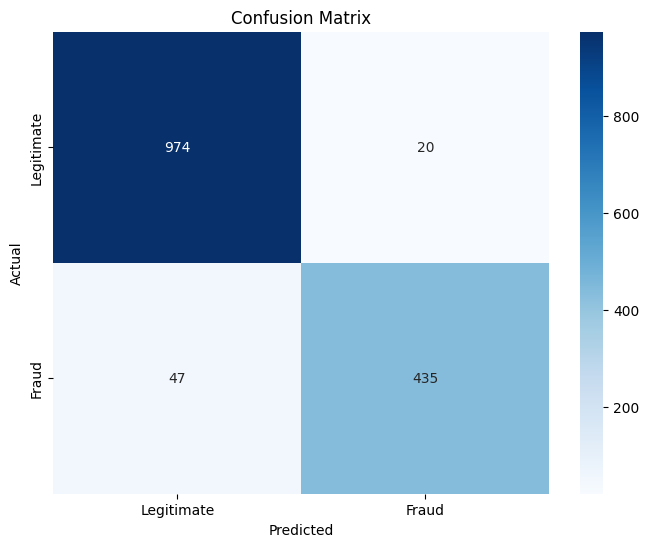

In [178]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#gradient Boosting Classifier

In [188]:
from sklearn.ensemble import GradientBoostingClassifier

# Split the resampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train a Gradient Boosting model
classifier = GradientBoostingClassifier(random_state=0)
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)


In [189]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
avg_precision = average_precision_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Average Precision Score:", avg_precision)


Accuracy: 0.9728997289972899
Precision: 0.9783549783549783
Recall: 0.9377593360995851
F1 Score: 0.9576271186440677
ROC AUC Score: 0.9638494869632734
Average Precision Score: 0.9377867182239208


In [190]:
class_names = ['Legitimate', 'Fraud']
report = classification_report(y_test, y_pred, target_names=class_names)
print("Classification Report:\n", report)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)


Classification Report:
               precision    recall  f1-score   support

  Legitimate       0.97      0.99      0.98       994
       Fraud       0.98      0.94      0.96       482

    accuracy                           0.97      1476
   macro avg       0.97      0.96      0.97      1476
weighted avg       0.97      0.97      0.97      1476



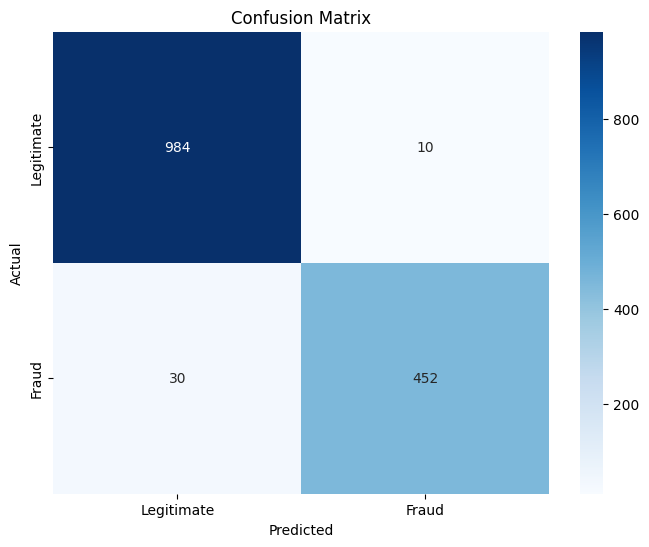

In [191]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#SVC MODEL

In [184]:
from sklearn.svm import SVC

# Split the resampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train an SVM model
classifier = SVC()
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

In [185]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
avg_precision = average_precision_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Average Precision Score:", avg_precision)


Accuracy: 0.959349593495935
Precision: 0.9752252252252253
Recall: 0.8983402489626556
F1 Score: 0.9352051835853132
ROC AUC Score: 0.9436369252861567
Average Precision Score: 0.9092819036018106


In [186]:
class_names = ['Legitimate', 'Fraud']
report = classification_report(y_test, y_pred, target_names=class_names)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

  Legitimate       0.95      0.99      0.97       994
       Fraud       0.98      0.90      0.94       482

    accuracy                           0.96      1476
   macro avg       0.96      0.94      0.95      1476
weighted avg       0.96      0.96      0.96      1476



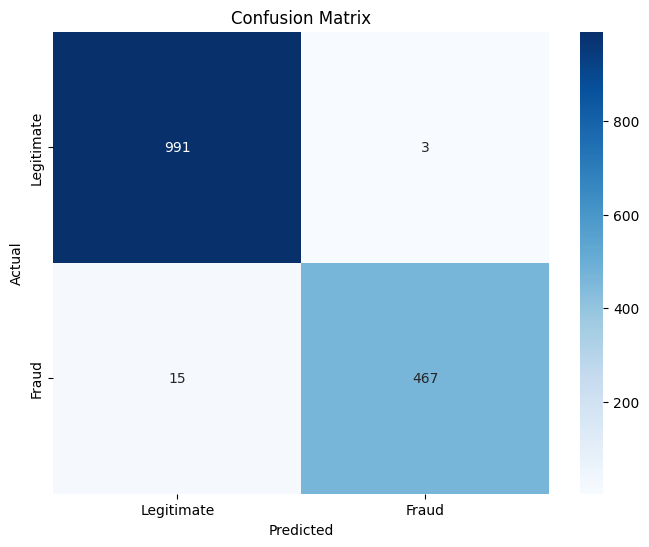

In [187]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#RandomForestClassifier

In [192]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
classifier = RandomForestClassifier(random_state=0)
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)


In [193]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
avg_precision = average_precision_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Average Precision Score:", avg_precision)

Accuracy: 0.9878048780487805
Precision: 0.9936170212765958
Recall: 0.9688796680497925
F1 Score: 0.98109243697479
ROC AUC Score: 0.9829307796989406
Average Precision Score: 0.972857931369108


In [194]:
class_names = ['Legitimate', 'Fraud']
report = classification_report(y_test, y_pred, target_names=class_names)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

  Legitimate       0.99      1.00      0.99       994
       Fraud       0.99      0.97      0.98       482

    accuracy                           0.99      1476
   macro avg       0.99      0.98      0.99      1476
weighted avg       0.99      0.99      0.99      1476



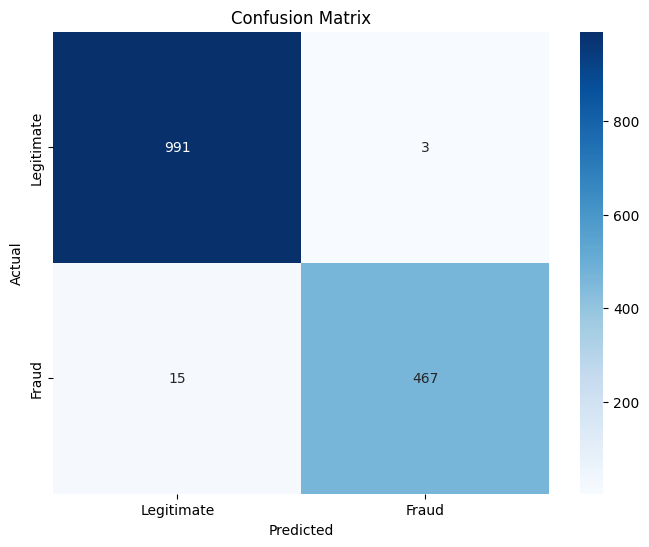

In [195]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#Hyperparameter Tuning on Random Forest *Classifier*

In [197]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

classifier = RandomForestClassifier(random_state=0)

grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_classifier = RandomForestClassifier(**best_params, random_state=0)
best_classifier.fit(X_train, y_train)

y_pred = best_classifier.predict(X_test)


In [198]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
avg_precision = average_precision_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Average Precision Score:", avg_precision)

Best Hyperparameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.9878048780487805
Precision: 0.9936170212765958
Recall: 0.9688796680497925
F1 Score: 0.98109243697479
ROC AUC Score: 0.9829307796989406
Average Precision Score: 0.972857931369108


In [199]:
class_names = ['Legitimate', 'Fraud']
report = classification_report(y_test, y_pred, target_names=class_names)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

  Legitimate       0.99      1.00      0.99       994
       Fraud       0.99      0.97      0.98       482

    accuracy                           0.99      1476
   macro avg       0.99      0.98      0.99      1476
weighted avg       0.99      0.99      0.99      1476



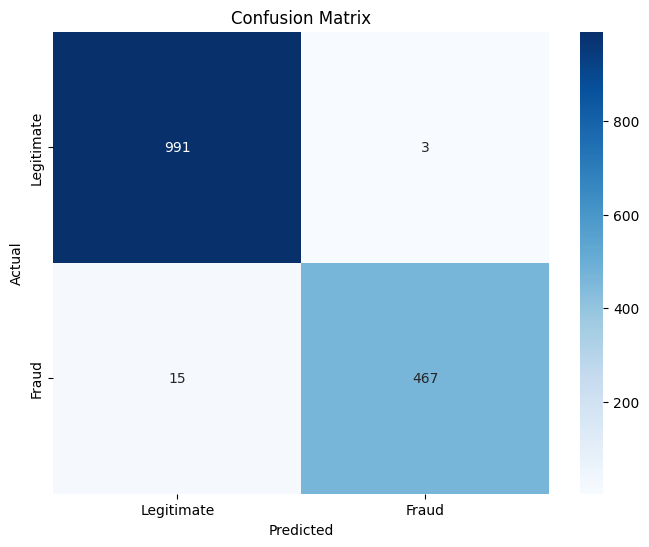

In [200]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()